<a href="https://colab.research.google.com/github/mohitsharmas97/Deep_learning_notebooks/blob/main/DL_day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-churn-dataset' dataset.
Path to dataset files: /kaggle/input/customer-churn-dataset


In [3]:
cd /kaggle/input/customer-churn-dataset

/kaggle/input/customer-churn-dataset


In [4]:
ls

customer_churn_dataset-testing-master.csv
customer_churn_dataset-training-master.csv


In [5]:
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
df.head(3)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0


In [7]:
df.isnull()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,False,False,False,False,False,False,False,False,False,False,False,False
64370,False,False,False,False,False,False,False,False,False,False,False,False
64371,False,False,False,False,False,False,False,False,False,False,False,False
64372,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [12]:
df.shape

(64374, 12)

In [13]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Subscription Type', 'Contract Length'], drop_first=True)
display(df_encoded.head())

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,False,False,False,True,False
1,2,41,28,28,7,13,584,20,0,False,False,True,True,False
2,3,47,27,10,2,29,757,21,0,True,True,False,False,False
3,4,35,9,12,5,17,232,18,0,True,True,False,False,True
4,5,53,58,24,9,2,533,18,0,False,False,True,False,False


In [14]:
input_data = df_encoded.drop('Churn', axis=1)
output_data = df_encoded['Churn']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_data = pd.DataFrame(scaler.fit_transform(input_data), columns=input_data.columns)

In [16]:
df_encoded.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,False,False,False,True,False
1,2,41,28,28,7,13,584,20,0,False,False,True,True,False
2,3,47,27,10,2,29,757,21,0,True,True,False,False,False
3,4,35,9,12,5,17,232,18,0,True,True,False,False,True
4,5,53,58,24,9,2,533,18,0,False,False,True,False,False


In [ ]:
input_data.shape

(64374, 13)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(input_data, output_data, test_size=0.2,random_state=42)

In [19]:
x_train.shape

(51499, 13)

In [20]:
import tensorflow

In [21]:
from keras.layers import Dense
from keras.models import Sequential

In [22]:
ann=Sequential()

In [23]:
ann.add(Dense(10,input_dim=13,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(4,activation='relu'))
ann.add(Dense(1,activation='sigmoid')) #layers bnayi 4

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
ann.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test), verbose=1)

Epoch 1/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8066 - loss: 0.4136 - val_accuracy: 0.9038 - val_loss: 0.2289
Epoch 2/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9077 - loss: 0.2141 - val_accuracy: 0.9219 - val_loss: 0.1859
Epoch 3/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9254 - loss: 0.1751 - val_accuracy: 0.9323 - val_loss: 0.1608
Epoch 4/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9341 - loss: 0.1529 - val_accuracy: 0.9416 - val_loss: 0.1385
Epoch 5/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9455 - loss: 0.1330 - val_accuracy: 0.9508 - val_loss: 0.1224
Epoch 6/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9495 - loss: 0.1239 - val_accuracy: 0.9552 - val_loss: 0.1125
Epoch 7/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9556 - loss: 0.1086 - val_accuracy: 0.9598 - val_loss: 0.0995
Epoch 8/10
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9633 - loss: 0.0939 -

In [38]:
ann.history.history

{'accuracy': [0.8629099726676941,
  0.9127556085586548,
  0.9259403347969055,
  0.9377075433731079,
  0.946018397808075,
  0.9526786804199219,
  0.9574360847473145,
  0.962659478187561,
  0.9661546945571899,
  0.9685819149017334],
 'loss': [0.3117474615573883,
  0.20373152196407318,
  0.1723436713218689,
  0.1469639539718628,
  0.12944351136684418,
  0.11704374104738235,
  0.10633159428834915,
  0.09665971994400024,
  0.08866654336452484,
  0.08196822553873062],
 'val_accuracy': [0.9038446545600891,
  0.9219417572021484,
  0.9323495030403137,
  0.9415922164916992,
  0.9507572650909424,
  0.9551844596862793,
  0.9597669839859009,
  0.9631068110466003,
  0.9693204164505005,
  0.9704077839851379],
 'val_loss': [0.2289491444826126,
  0.18593114614486694,
  0.16075152158737183,
  0.13852214813232422,
  0.12244444340467453,
  0.11249300092458725,
  0.0994519293308258,
  0.09181367605924606,
  0.08409813046455383,
  0.07705768197774887]}

In [39]:
train_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']

In [40]:
len(test_accuracy)

10

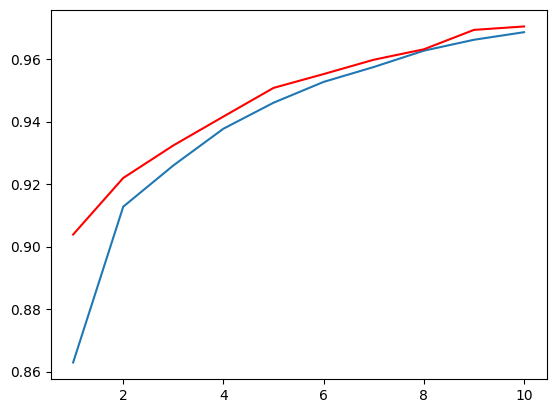

In [41]:
plt.plot([i for i in range(1,11)], train_accuracy)
plt.plot([i for i in range(1,11)], test_accuracy, c='red')
plt.show()

In [42]:
 loss, accuracy = ann.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9716 - loss: 0.0721
Test Loss: 0.0771
Test Accuracy: 0.9704


In [43]:
train_accuracy

[0.8629099726676941,
 0.9127556085586548,
 0.9259403347969055,
 0.9377075433731079,
 0.946018397808075,
 0.9526786804199219,
 0.9574360847473145,
 0.962659478187561,
 0.9661546945571899,
 0.9685819149017334]

In [31]:
prd=ann.predict(x_test)

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
prd_data=[]
for i in prd:
    if i>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,prd_data)

0.9704077669902913

In [35]:
prd1=ann.predict(x_train)
prd_data1=[]
for i in prd1:
    if i>0.5:
        prd_data1.append(1)
    else:
        prd_data1.append(0)

1610/1610 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [36]:
accuracy_score(y_train,prd_data1)

0.9715722635390979

Now that the training history is plotted, let's evaluate the model's performance on the test set using additional metrics.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
loss, accuracy =ann.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Get predictions for the test set
y_pred = ann.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Test Loss: 0.0743
Test Accuracy: 0.9706
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6793
           1       0.97      0.97      0.97      6082

    accuracy                           0.97     12875
   macro avg       0.97      0.97      0.97     12875
weighted avg       0.97      0.97      0.97     12875


Confusion Matrix:
[[6602  191]
 [ 188 5894]]
